In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
Data = pd.read_csv('Ice_cream selling data.csv')
Data

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


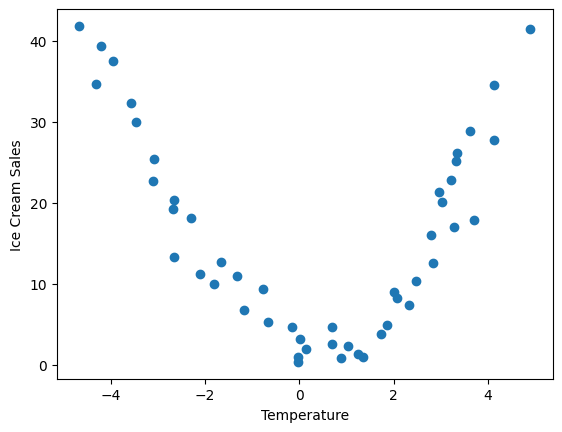

In [15]:
x = Data['Temperature (°C)']
y = Data['Ice Cream Sales (units)']

plt.scatter(x,y)
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.show()

In [13]:
Data.isnull().sum()

,0
Temperature (°C),0
Ice Cream Sales (units),0


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [72]:
x_test

,Temperature (°C)
13,-1.818938
45,3.704057
47,4.133534
44,3.610778
17,-0.773330
27,1.024181
26,0.874905
25,0.693599
31,1.850552
19,-0.149635


In [73]:
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree = 4 , include_bias=True)
X_train_Poly = Poly.fit_transform(x_train.values.reshape(-1 , 1))
X_Test_Poly = Poly.transform(x_test.values.reshape(-1 , 1))


from sklearn.linear_model import LinearRegression
Poly_model = LinearRegression()
Poly_model.fit(X_train_Poly , y_train)

LinearRegression()

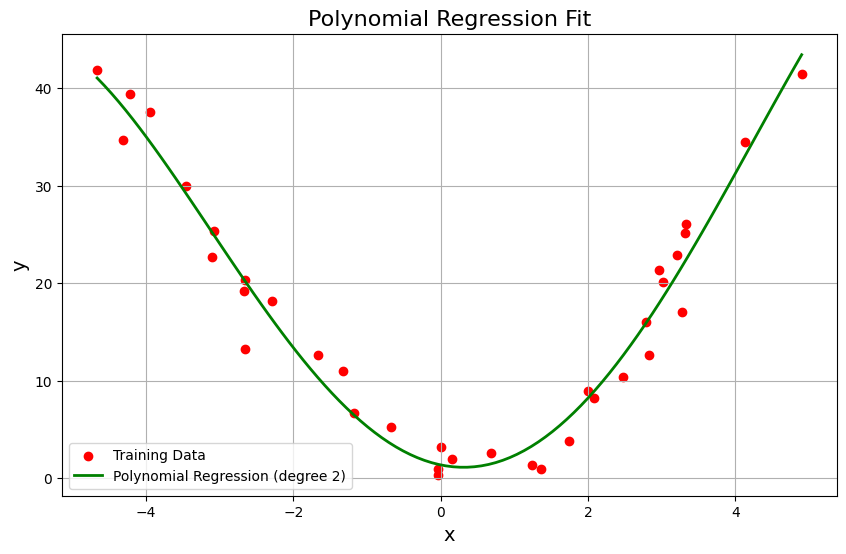

In [74]:
x_range = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)
x_range_poly = Poly.transform(x_range)
y_range_pred = Poly_model.predict(x_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='red', label='Training Data')
plt.plot(x_range, y_range_pred, color='green', linewidth=2, label='Polynomial Regression (degree 2)')
plt.title("Polynomial Regression Fit", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [75]:
y_test

,Ice Cream Sales (units)
13,10.012868
45,17.843957
47,27.698383
44,28.912188
17,9.392969
27,2.313806
26,0.789974
25,4.625689
31,4.857988
19,4.673643


In [76]:
x_predict = np.array([-4.662263]).reshape(-1,1)
y_predict = Poly_model.predict(Poly.transform(x_predict))
y_predict

array([41.05672779])